In [8]:
from pathlib import Path
from aicsimageio import AICSImage
import dask
from dask.distributed import LocalCluster, Client
import dask.array as da
import time
# import skimage.io as ski

# import pyclesperanto_prototype as cle
import napari
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd

In [3]:
def aics_file(file_path):
    data = AICSImage(file_path)
    image = data.get_image_data('ZYX', C=0, T=0)
    return image

# initialise by lazily loaded and accessed as needed
def aics_file_5d(file_path):
    data = AICSImage(file_path)
    return data

# load aicsimage into numpy array
def get_image(aicsimage):
    image = aicsimage.get_image_data('ZYX', C=0, T=0)
    return image

def read_file(file_path):
    image = ski.imread(file_path)
    return image

In [4]:
folder_path = Path.cwd()
file_pattern = '20191104_ABAT029_REG1-CTRL_DAPI_CD31-ENDOM-680_Th-647_hCD45-33-488_aSMA-CY3_aGFP-594.ome.btf'
filenames = []

for file in folder_path.glob(file_pattern):
    filenames = np.append(filenames, file.name)
filenames = sorted(filenames)

filenames

['20191104_ABAT029_REG1-CTRL_DAPI_CD31-ENDOM-680_Th-647_hCD45-33-488_aSMA-CY3_aGFP-594.ome.btf']

In [ ]:
%%timeit
aics_image = aics_file(filenames[0])

In [7]:
%%timeit -r 10 -n 10
aics_image_5d = AICSImage(filenames[0])

6.6 ms ± 336 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [22]:
%%timeit
skimage_image = read_file(filenames[0])

34.2 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Measuring interactivity

In [1]:
# dataframe management
def process_time(df):
    df = pd.read_csv(df, header=None, names=['time'])
    df.index.rename('z-slice', inplace=True)
    return df

def plot_timelinegraph(df1, df2):
    
    avg1 = df1.mean()
    avg2 = df2.mean()
    
    fig= plt.figure(figsize=(8,4))
    ax = plt.subplot(111)

    ax.plot(df1['time'], label='dask loading')
    ax.axhline(avg1[0], alpha=0.5, linestyle='--')

    ax.plot(df2['time'], label='RAM', color='r')
    ax.axhline(avg2[0], color='r', alpha=0.5, linestyle='--')

    plt.xlabel('Iterations')
    plt.ylabel('Time /s')
    ax.legend()
    ax.tick_params(direction='in')

In [4]:
dask_df = process_time('channels_dask_loading.csv')
ram_df = process_time('channels_ram_loading.csv')
dask_df.head()

,time
z-slice,
0,8.681946
1,2.968089
2,4.385744
3,8.580410
4,8.723716


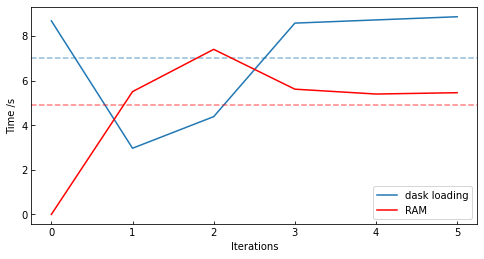

In [10]:
plot_timelinegraph(dask_df, ram_df)